In [1]:
import pandas as pd
import mysql.connector as msql
from mysql.connector import Error
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score

In [2]:
conn = msql.connect(
host="localhost", user="root",database='superstore', password="9812762827")
df_customer = pd.read_sql_query("SELECT * FROM customer",conn)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11024\1365752817.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_customer = pd.read_sql_query("SELECT * FROM customer",conn)


In [3]:
df_customer

,Customer ID,Customer Name,Segment
0,AA-10315,Alex Avila,Consumer
1,AA-10375,Allen Armold,Consumer
2,AA-10480,Andrew Allen,Consumer
3,AA-10645,Anna Andreadi,Consumer
4,AA-315,Alex Avila,Consumer
...,...,...,...
1584,YS-21880,Yana Sorensen,Corporate
1585,ZC-11910,Zuschuss Carroll,Consumer
1586,ZC-21910,Zuschuss Carroll,Consumer
1587,ZD-11925,Zuschuss Donatelli,Consumer


In [4]:
df_product = pd.read_sql_query("SELECT * FROM product",conn)
df_product

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11024\3984208670.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_product = pd.read_sql_query("SELECT * FROM product",conn)


,Product ID,Product Name,Category,Sub-Category
0,FUR-ADV-10000002,"Advantus Photo Frame, Duo Pack",Furniture,Furnishings
1,FUR-ADV-10000108,"Advantus Clock, Erganomic",Furniture,Furnishings
2,FUR-ADV-10000183,"Advantus Photo Frame, Black",Furniture,Furnishings
3,FUR-ADV-10000188,"Advantus Stacking Tray, Erganomic",Furniture,Furnishings
4,FUR-ADV-10000190,"Advantus Frame, Duo Pack",Furniture,Furnishings
...,...,...,...,...
10241,TEC-STA-10004181,"StarTech Inkjet, Durable",Technology,Machines
10242,TEC-STA-10004536,"StarTech Inkjet, Wireless",Technology,Machines
10243,TEC-STA-10004542,"StarTech Calculator, Durable",Technology,Machines
10244,TEC-STA-10004834,"StarTech Receipt Printer, Red",Technology,Machines


In [5]:
df_order_detail = pd.read_sql_query("SELECT * FROM order_detail",conn)
df_order_detail

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11024\3478954931.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_order_detail = pd.read_sql_query("SELECT * FROM order_detail",conn)


,Row ID,Order ID,Product ID,Sales,Quantity,Discount,Profit,Shipping Cost
0,1,MX-2014-143658,OFF-LA-10002782,13.08,3,0.0,4.56,1.033
1,2,MX-2012-155047,FUR-FU-10004015,252.16,8,0.0,90.72,13.449
2,3,MX-2012-155047,FUR-BO-10002352,193.28,2,0.0,54.08,9.627
3,4,MX-2012-155047,OFF-BI-10004428,35.44,4,0.0,4.96,1.371
4,5,MX-2012-155047,OFF-AR-10004594,71.60,2,0.0,11.44,3.787
...,...,...,...,...,...,...,...,...
49665,51286,HU-2012-7730,OFF-AVE-10004570,11.07,1,0.0,3.42,1.980
49666,51287,HU-2012-7730,TEC-LOG-10004419,61.44,2,0.0,18.42,13.020
49667,51288,HU-2012-7730,OFF-BOS-10002705,80.52,4,0.0,20.88,8.780
49668,51289,HU-2012-7730,OFF-ENE-10004132,130.44,4,0.0,33.84,18.970


In [6]:
dis=df_order_detail[df_order_detail['Discount']>0]
dis

,Row ID,Order ID,Product ID,Sales,Quantity,Discount,Profit,Shipping Cost
16,17,US-2013-126655,OFF-EN-10000761,18.840,2,0.4,-6.600,1.602
17,18,US-2013-126655,FUR-FU-10003066,308.280,7,0.4,-149.100,27.770
18,19,US-2013-126655,OFF-EN-10000075,40.176,2,0.4,-6.064,2.137
19,20,US-2013-126655,OFF-EN-10002226,8.784,3,0.4,-4.836,0.380
20,21,MX-2013-167759,FUR-CH-10002132,273.472,4,0.2,95.712,48.165
...,...,...,...,...,...,...,...,...
49655,51276,TU-2013-7900,TEC-BEL-10001971,16.860,1,0.6,-11.400,6.490
49656,51277,TU-2013-7800,OFF-ELI-10001812,19.452,1,0.6,-26.268,0.490
49657,51278,TU-2013-7800,OFF-ADV-10004598,5.352,1,0.6,-4.818,0.250
49658,51279,TU-2013-7800,OFF-ADV-10000331,5.580,1,0.6,-1.980,0.410


In [7]:
df_order_returned = pd.read_sql_query("SELECT * FROM returned",conn)
df_order_returned

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11024\2055980486.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_order_returned = pd.read_sql_query("SELECT * FROM returned",conn)


,Order ID
0,CA-2011-100762
1,CA-2011-100867
2,CA-2011-102652
3,CA-2011-103373
4,CA-2011-103744
...,...
1167,US-2014-160745
1168,US-2014-161830
1169,US-2014-167178
1170,US-2014-167500


In [8]:
df_shipping = pd.read_sql_query("SELECT * FROM shipping",conn)
df_shipping

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11024\518335040.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_shipping = pd.read_sql_query("SELECT * FROM shipping",conn)


,Shipping ID,Order ID,Ship Date,Ship Mode,City,State,Country,Region
0,21043,CA-2012-124891,2012-07-31,Same Day,New York City,New York,United States,East
1,21044,IN-2013-77878,2013-02-07,Second Class,Wollongong,New South Wales,Australia,Oceania
2,21045,IN-2013-71249,2013-10-18,First Class,Brisbane,Queensland,Australia,Oceania
3,21046,ES-2013-1579342,2013-01-30,First Class,Berlin,Berlin,Germany,Central
4,21047,SG-2013-4320,2013-11-06,Same Day,Dakar,Dakar,Senegal,Africa
...,...,...,...,...,...,...,...,...
25028,46071,ZI-2011-4350,2011-03-26,Standard Class,Harare,Harare,Zimbabwe,Africa
25029,46072,MX-2014-169530,2014-06-11,First Class,Bragança Paulista,São Paulo,Brazil,South
25030,46073,IN-2014-72327,2014-05-30,Same Day,Lucknow,Uttar Pradesh,India,Central Asia
25031,46074,IN-2014-57662,2014-08-10,Standard Class,Townsville,Queensland,Australia,Oceania


In [9]:
df_order = pd.read_sql_query("SELECT * FROM `order`",conn)
df_order

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11024\2602445205.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_order = pd.read_sql_query("SELECT * FROM `order`",conn)


,Order ID,Customer ID,Order Priority,Order Date,Market
0,AE-2011-9160,PO-8865,Medium,2011-10-03,EMEA
1,AE-2013-1130,EB-4110,High,2013-10-14,EMEA
2,AE-2013-1530,MY-7380,High,2013-12-31,EMEA
3,AE-2014-2840,PG-8820,Critical,2014-11-05,EMEA
4,AE-2014-3830,GH-4665,Medium,2014-12-13,EMEA
...,...,...,...,...,...
25028,ZI-2014-7160,EH-4125,Medium,2014-10-30,Africa
25029,ZI-2014-7610,BS-1380,Medium,2014-03-24,Africa
25030,ZI-2014-9540,BT-1395,Medium,2014-06-09,Africa
25031,ZI-2014-9550,JC-5775,Medium,2014-12-18,Africa


In [10]:
merge_df=pd.merge(df_order_detail,df_product)
merge_df=merge_df.drop(columns=['Shipping Cost','Product Name','Category','Row ID'])
merge_df

,Order ID,Product ID,Sales,Quantity,Discount,Profit,Sub-Category
0,MX-2014-143658,OFF-LA-10002782,13.080,3,0.0,4.560,Labels
1,MX-2014-137575,OFF-LA-10002782,30.520,7,0.0,10.640,Labels
2,US-2011-115392,OFF-LA-10002782,7.848,3,0.4,-0.672,Labels
3,MX-2013-122910,OFF-LA-10002782,4.360,1,0.0,1.520,Labels
4,MX-2012-112291,OFF-LA-10002782,8.720,2,0.0,3.040,Labels
...,...,...,...,...,...,...,...
49665,IZ-2013-9470,FUR-DAN-10001557,170.700,1,0.0,58.020,Bookcases
49666,BO-2014-9040,OFF-KRA-10002441,18.840,1,0.0,9.210,Envelopes
49667,SF-2012-5260,OFF-GRE-10003213,16.950,1,0.0,1.860,Paper
49668,TU-2014-7870,FUR-CHR-10000888,177.960,1,0.6,-124.590,Tables


In [11]:
product_count=merge_df['Product ID'].value_counts()
merge_df['order Count']=merge_df['Product ID'].map(product_count)
merge_df[2340:2348]

,Order ID,Product ID,Sales,Quantity,Discount,Profit,Sub-Category,order Count
2340,US-2014-127579,TEC-AC-10001246,70.596,3,0.4,-22.404,Accessories,7
2341,US-2014-118794,TEC-AC-10001246,94.128,4,0.4,-29.872,Accessories,7
2342,MX-2013-147802,TEC-AC-10001246,78.440,2,0.0,16.440,Accessories,7
2343,MX-2014-131149,TEC-PH-10001917,262.140,3,0.0,5.220,Phones,13
2344,MX-2012-169894,TEC-PH-10001917,524.280,6,0.0,10.440,Phones,13
2345,MX-2014-114797,TEC-PH-10001917,262.140,3,0.0,5.220,Phones,13
2346,MX-2013-150721,TEC-PH-10001917,524.280,6,0.0,10.440,Phones,13
2347,MX-2014-117240,TEC-PH-10001917,262.140,3,0.0,5.220,Phones,13


In [12]:
merge_df['Profit']=(merge_df['Profit']/merge_df['Quantity'] )
merge_df['Sales']=(merge_df['Sales']/ merge_df['Quantity'])
merge_df

,Order ID,Product ID,Sales,Quantity,Discount,Profit,Sub-Category,order Count
0,MX-2014-143658,OFF-LA-10002782,4.360,3,0.0,1.520,Labels,5
1,MX-2014-137575,OFF-LA-10002782,4.360,7,0.0,1.520,Labels,5
2,US-2011-115392,OFF-LA-10002782,2.616,3,0.4,-0.224,Labels,5
3,MX-2013-122910,OFF-LA-10002782,4.360,1,0.0,1.520,Labels,5
4,MX-2012-112291,OFF-LA-10002782,4.360,2,0.0,1.520,Labels,5
...,...,...,...,...,...,...,...,...
49665,IZ-2013-9470,FUR-DAN-10001557,170.700,1,0.0,58.020,Bookcases,1
49666,BO-2014-9040,OFF-KRA-10002441,18.840,1,0.0,9.210,Envelopes,1
49667,SF-2012-5260,OFF-GRE-10003213,16.950,1,0.0,1.860,Paper,1
49668,TU-2014-7870,FUR-CHR-10000888,177.960,1,0.6,-124.590,Tables,1


In [13]:
non_repet_df=merge_df.drop_duplicates(subset=['Product ID'])
non_repet_df=non_repet_df.drop(columns=['Quantity'])
non_repet_df

,Order ID,Product ID,Sales,Discount,Profit,Sub-Category,order Count
0,MX-2014-143658,OFF-LA-10002782,4.360,0.0,1.520,Labels,5
5,MX-2012-155047,FUR-FU-10004015,31.520,0.0,11.340,Furnishings,9
14,MX-2012-155047,FUR-BO-10002352,96.640,0.0,27.040,Bookcases,7
21,MX-2012-155047,OFF-BI-10004428,8.860,0.0,1.240,Binders,7
28,MX-2012-155047,OFF-AR-10004594,35.800,0.0,5.720,Art,4
...,...,...,...,...,...,...,...
49665,IZ-2013-9470,FUR-DAN-10001557,170.700,0.0,58.020,Bookcases,1
49666,BO-2014-9040,OFF-KRA-10002441,18.840,0.0,9.210,Envelopes,1
49667,SF-2012-5260,OFF-GRE-10003213,16.950,0.0,1.860,Paper,1
49668,TU-2014-7870,FUR-CHR-10000888,177.960,0.6,-124.590,Tables,1


In [14]:
neg_profit=(non_repet_df['Profit']<0).sum()
neg_profit

2771

In [15]:
dis=non_repet_df[non_repet_df['Discount']>0]
dis

,Order ID,Product ID,Sales,Discount,Profit,Sub-Category,order Count
95,US-2013-126655,OFF-EN-10000761,9.420,0.4,-3.300,Envelopes,7
102,US-2013-126655,FUR-FU-10003066,44.040,0.4,-21.300,Furnishings,3
105,US-2013-126655,OFF-EN-10000075,20.088,0.4,-3.032,Envelopes,8
113,US-2013-126655,OFF-EN-10002226,2.928,0.4,-1.612,Envelopes,5
118,MX-2013-167759,FUR-CH-10002132,68.368,0.2,23.928,Chairs,13
...,...,...,...,...,...,...,...
49626,KZ-2013-2740,TEC-CAN-10000932,95.949,0.7,-143.931,Copiers,3
49629,TU-2013-7360,FUR-TEN-10002418,20.124,0.6,-11.076,Furnishings,1
49648,TU-2014-2710,OFF-OIC-10004999,6.012,0.6,-3.018,Fasteners,2
49668,TU-2014-7870,FUR-CHR-10000888,177.960,0.6,-124.590,Tables,1


In [16]:
un_category=non_repet_df['Sub-Category'].unique()
un_category

array(['Labels', 'Furnishings', 'Bookcases', 'Binders', 'Art',
       'Envelopes', 'Machines', 'Supplies', 'Accessories', 'Fasteners',
       'Chairs', 'Copiers', 'Storage', 'Phones', 'Appliances', 'Tables',
       'Paper'], dtype=object)

In [17]:
encoder=LabelEncoder()
non_repet_df['Category Encode']=encoder.fit_transform(non_repet_df['Sub-Category'])
non_repet_df

,Order ID,Product ID,Sales,Discount,Profit,Sub-Category,order Count,Category Encode
0,MX-2014-143658,OFF-LA-10002782,4.360,0.0,1.520,Labels,5,10
5,MX-2012-155047,FUR-FU-10004015,31.520,0.0,11.340,Furnishings,9,9
14,MX-2012-155047,FUR-BO-10002352,96.640,0.0,27.040,Bookcases,7,4
21,MX-2012-155047,OFF-BI-10004428,8.860,0.0,1.240,Binders,7,3
28,MX-2012-155047,OFF-AR-10004594,35.800,0.0,5.720,Art,4,2
...,...,...,...,...,...,...,...,...
49665,IZ-2013-9470,FUR-DAN-10001557,170.700,0.0,58.020,Bookcases,1,4
49666,BO-2014-9040,OFF-KRA-10002441,18.840,0.0,9.210,Envelopes,1,7
49667,SF-2012-5260,OFF-GRE-10003213,16.950,0.0,1.860,Paper,1,12
49668,TU-2014-7870,FUR-CHR-10000888,177.960,0.6,-124.590,Tables,1,16


In [18]:
main_df=non_repet_df.drop(columns=['Order ID','Sub-Category'])
main_df

,Product ID,Sales,Discount,Profit,order Count,Category Encode
0,OFF-LA-10002782,4.360,0.0,1.520,5,10
5,FUR-FU-10004015,31.520,0.0,11.340,9,9
14,FUR-BO-10002352,96.640,0.0,27.040,7,4
21,OFF-BI-10004428,8.860,0.0,1.240,7,3
28,OFF-AR-10004594,35.800,0.0,5.720,4,2
...,...,...,...,...,...,...
49665,FUR-DAN-10001557,170.700,0.0,58.020,1,4
49666,OFF-KRA-10002441,18.840,0.0,9.210,1,7
49667,OFF-GRE-10003213,16.950,0.0,1.860,1,12
49668,FUR-CHR-10000888,177.960,0.6,-124.590,1,16


In [19]:
# main_df['Profit']=main_df['Profit'].apply(lambda x:round(x))

In [20]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10246 entries, 0 to 49669
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product ID       10246 non-null  object 
 1   Sales            10246 non-null  float64
 2   Discount         10246 non-null  float64
 3   Profit           10246 non-null  float64
 4   order Count      10246 non-null  int64  
 5   Category Encode  10246 non-null  int32  
dtypes: float64(3), int32(1), int64(1), object(1)
memory usage: 520.3+ KB


In [21]:
main_df['Percentage Profit']=(main_df['Sales']/main_df['Profit'])
main_df

,Product ID,Sales,Discount,Profit,order Count,Category Encode,Percentage Profit
0,OFF-LA-10002782,4.360,0.0,1.520,5,10,2.868421
5,FUR-FU-10004015,31.520,0.0,11.340,9,9,2.779541
14,FUR-BO-10002352,96.640,0.0,27.040,7,4,3.573964
21,OFF-BI-10004428,8.860,0.0,1.240,7,3,7.145161
28,OFF-AR-10004594,35.800,0.0,5.720,4,2,6.258741
...,...,...,...,...,...,...,...
49665,FUR-DAN-10001557,170.700,0.0,58.020,1,4,2.942089
49666,OFF-KRA-10002441,18.840,0.0,9.210,1,7,2.045603
49667,OFF-GRE-10003213,16.950,0.0,1.860,1,12,9.112903
49668,FUR-CHR-10000888,177.960,0.6,-124.590,1,16,-1.428365


In [22]:
mean_profit_percent = main_df.groupby('Category Encode')['Profit'].mean()
main_df['Mean Profit Categorical'] =main_df['Category Encode'].map(mean_profit_percent)
main_df

,Product ID,Sales,Discount,Profit,order Count,Category Encode,Percentage Profit,Mean Profit Categorical
0,OFF-LA-10002782,4.360,0.0,1.520,5,10,2.868421,1.240659
5,FUR-FU-10004015,31.520,0.0,11.340,9,9,2.779541,4.498364
14,FUR-BO-10002352,96.640,0.0,27.040,7,4,3.573964,18.807918
21,OFF-BI-10004428,8.860,0.0,1.240,7,3,7.145161,5.364744
28,OFF-AR-10004594,35.800,0.0,5.720,4,2,6.258741,2.749115
...,...,...,...,...,...,...,...,...
49665,FUR-DAN-10001557,170.700,0.0,58.020,1,4,2.942089,18.807918
49666,OFF-KRA-10002441,18.840,0.0,9.210,1,7,2.045603,2.899831
49667,OFF-GRE-10003213,16.950,0.0,1.860,1,12,9.112903,3.761474
49668,FUR-CHR-10000888,177.960,0.6,-124.590,1,16,-1.428365,-15.900527


In [23]:
un_category=main_df['Product ID'].value_counts()
un_category

Product ID
OFF-LA-10002782     1
FUR-BO-10003985     1
TEC-PH-10000011     1
FUR-TA-10002607     1
FUR-FU-10002505     1
                   ..
OFF-ST-10001050     1
TEC-MA-10002424     1
TEC-CO-10001413     1
TEC-CO-10004563     1
OFF-OIC-10004622    1
Name: count, Length: 10246, dtype: int64

In [24]:
least_sale=[]
for ind,record in main_df.iterrows():
    sale=record['Sales']
    meanP=record['Mean Profit Categorical']
    
    bS=(sale-(sale*meanP))+((meanP/2)*sale)
    
    
    least_sale.append(bS)


In [25]:
Production_price=[]
for ind,record in main_df.iterrows():
    sale=record['Sales']
    profit=record['Mean Profit Categorical']
    count=record['order Count']
    Discount=record['Discount'] 
    p=(sale-(profit*count*sale))-(sale*Discount)    
   
    
    Production_price.append(p)


In [26]:
main_df['Least Sale Price']=least_sale
main_df

,Product ID,Sales,Discount,Profit,order Count,Category Encode,Percentage Profit,Mean Profit Categorical,Least Sale Price
0,OFF-LA-10002782,4.360,0.0,1.520,5,10,2.868421,1.240659,1.655363
5,FUR-FU-10004015,31.520,0.0,11.340,9,9,2.779541,4.498364,-39.374213
14,FUR-BO-10002352,96.640,0.0,27.040,7,4,3.573964,18.807918,-812.158578
21,OFF-BI-10004428,8.860,0.0,1.240,7,3,7.145161,5.364744,-14.905815
28,OFF-AR-10004594,35.800,0.0,5.720,4,2,6.258741,2.749115,-13.409154
...,...,...,...,...,...,...,...,...,...
49665,FUR-DAN-10001557,170.700,0.0,58.020,1,4,2.942089,18.807918,-1434.555767
49666,OFF-KRA-10002441,18.840,0.0,9.210,1,7,2.045603,2.899831,-8.476405
49667,OFF-GRE-10003213,16.950,0.0,1.860,1,12,9.112903,3.761474,-14.928491
49668,FUR-CHR-10000888,177.960,0.6,-124.590,1,16,-1.428365,-15.900527,1592.788927


Text(0, 0.5, 'Value')

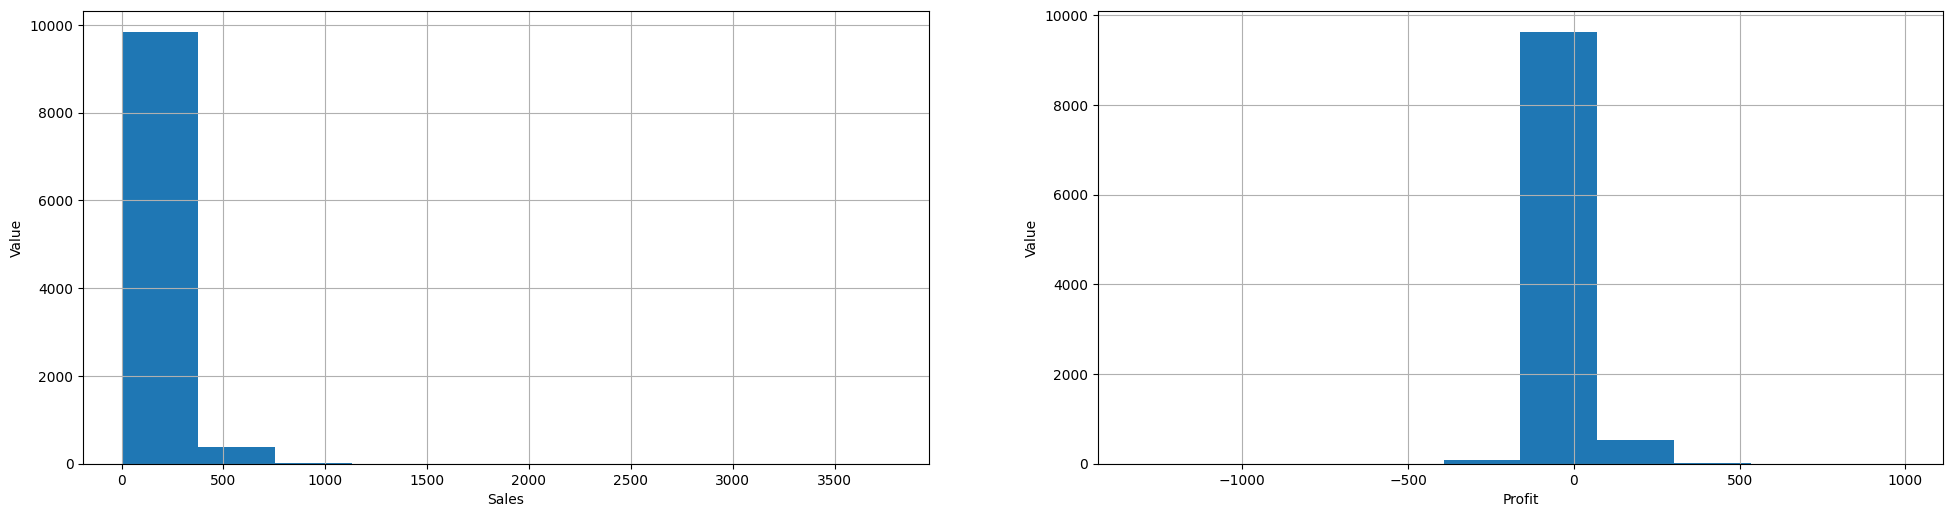

In [27]:
plt.figure(figsize=(24,20))

plt.subplot(3, 2, 1)
fig = main_df['Sales'].hist(bins=10)
fig.set_xlabel('Sales')
fig.set_ylabel('Value')


plt.subplot(3, 2, 2)
fig = main_df['Profit'].hist(bins=10)
fig.set_xlabel('Profit')
fig.set_ylabel('Value')

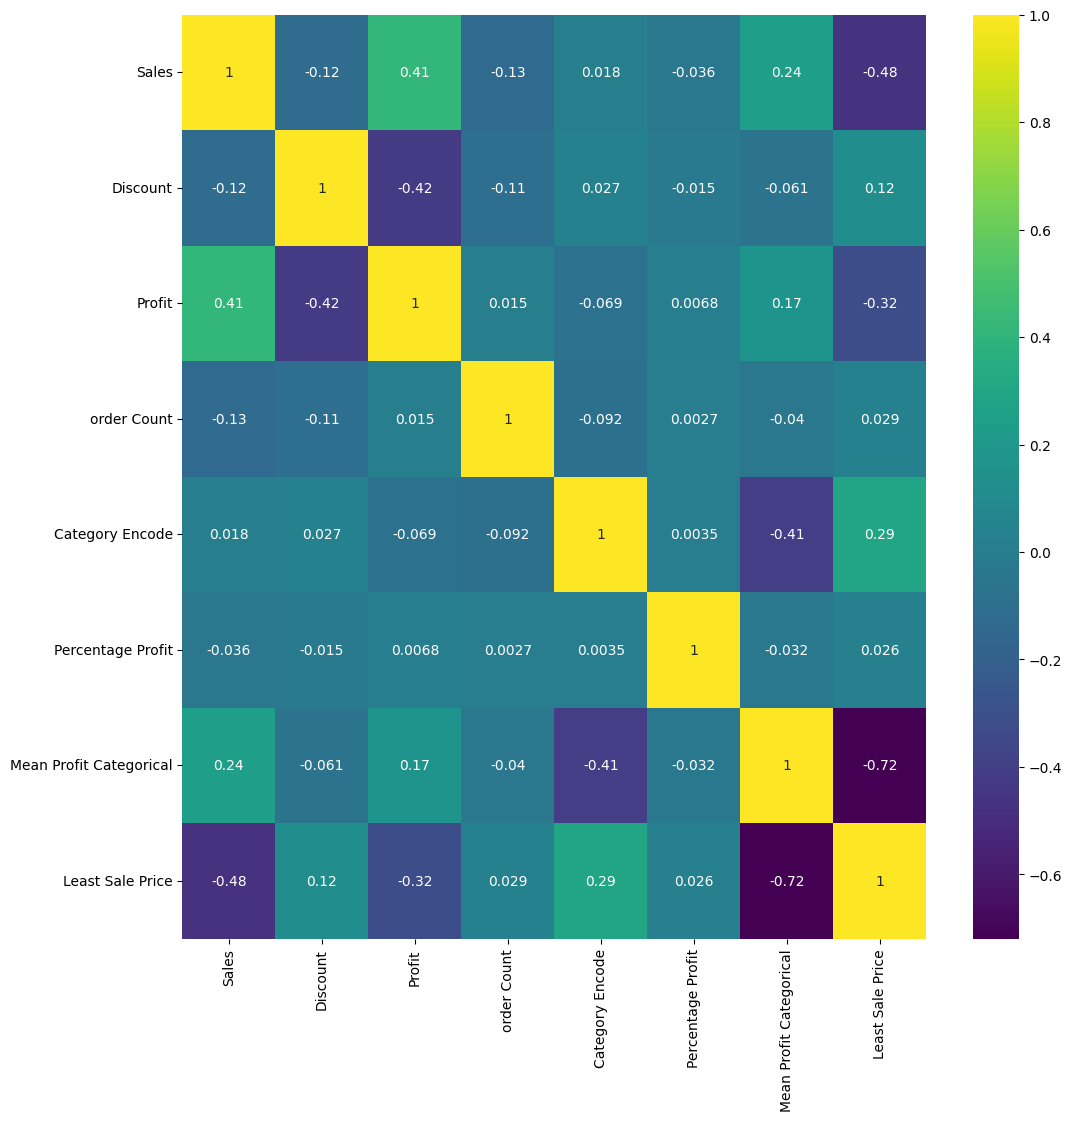

In [28]:
corr=main_df.drop(['Product ID'],axis=1).corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr,annot=True,cmap='viridis', ax=ax) 
plt.show()

In [29]:
name_models=[]
score_models=[]
mse_modles=[]

In [30]:
y=main_df['Profit']
X=main_df.drop(columns=['Profit','Product ID','Percentage Profit','Least Sale Price'])
y

0          1.520
5         11.340
14        27.040
21         1.240
28         5.720
          ...   
49665     58.020
49666      9.210
49667      1.860
49668   -124.590
49669     -3.252
Name: Profit, Length: 10246, dtype: float64

In [31]:
X

,Sales,Discount,order Count,Category Encode,Mean Profit Categorical
0,4.360,0.0,5,10,1.240659
5,31.520,0.0,9,9,4.498364
14,96.640,0.0,7,4,18.807918
21,8.860,0.0,7,3,5.364744
28,35.800,0.0,4,2,2.749115
...,...,...,...,...,...
49665,170.700,0.0,1,4,18.807918
49666,18.840,0.0,1,7,2.899831
49667,16.950,0.0,1,12,3.761474
49668,177.960,0.6,1,16,-15.900527


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.metrics import mean_squared_error

model = LinearRegression()


model.fit(X_train, y_train)


#val_predictions = model.predict(val_data)


test_predictions = model.predict(X_test)


#val_accuracy = model.score(val_data, val_labels)
test_accuracy_LinearRegression = model.score(X_test, y_test)

mse_LinearRegression=mean_squared_error(y_test, test_predictions)

print(mse_LinearRegression)
print("accuracy :")
#print(val_accuracy)
print(test_accuracy_LinearRegression)
name_models.append('LinearRegression')
score_models.append(test_accuracy_LinearRegression)
mse_modles.append(mse_LinearRegression)

2123.4862070527865
accuracy :
0.2758066517414097


In [34]:
y=main_df['Profit']
X=main_df.drop(columns=['Profit','Product ID','Percentage Profit','Least Sale Price'])


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# فرض کنید داده‌های آموزشی و برچسب‌ها را دارید

# تقسیم داده‌ها به سه قسمت: آموزشی، اعتبارسنجی و آزمون

# ساخت مدل گرادیان جنگل تصادفی با پارامترهای دلخواه
model = RandomForestRegressor(n_estimators=100, random_state=42)

# آموزش مدل با داده‌های آموزشی
model.fit(X_train, y_train)

# پیش‌بینی برچسب‌ها برای داده‌های اعتبارسنجی و آزمون
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# محاسبه معیار میانگین خطا (MSE) برای داده‌های اعتبارسنجی و آزمون
val_mse = mean_squared_error(y_val, y_val_pred)
mse_RandomForest = mean_squared_error(y_test, y_test_pred)

val_accuracy = model.score(X_val, y_val)
test_accuracy_RandomForest = model.score(X_test, y_test)

export_Predict=model.predict(X_test)
print("Validation Mean Squared Error:", val_mse)
print("Test Mean Squared Error:", mse_RandomForest)

print(val_accuracy)
print(test_accuracy_RandomForest)

name_models.append('RandomForestRegressor')
score_models.append(test_accuracy_RandomForest)
mse_modles.append(mse_RandomForest)

Validation Mean Squared Error: 802.9426856224254
Test Mean Squared Error: 888.80907862666
0.6128597553607478
0.7235533596179373


In [37]:
y=main_df['Profit']
X=main_df.drop(columns=['Profit','Product ID','Percentage Profit'])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score


degree = 1
model = make_pipeline(PolynomialFeatures(degree), RandomForestRegressor())

# آموزش مدل با داده‌های آموزشی
model.fit(X_train, y_train)
# پیش‌بینی با استفاده از مدل

predictions = model.predict(X_test)
mse_Polynomial = mean_squared_error(y_test, predictions)
Polynomial_score=model.score(X_test, y_test)

print(Polynomial_score)

name_models.append('RandomForest PolynomialFeatures')
score_models.append(Polynomial_score)
mse_modles.append(mse_Polynomial)

0.7291432575708268


In [40]:
from sklearn.linear_model import Ridge

alpha = 0.5  # پارامتر جریمه
model = Ridge(alpha=alpha)

# آموزش مدل با داده‌های آموزشی
model.fit(X_train, y_train)

# پیش‌بینی با استفاده از مدل

predictions = model.predict(X_test)
mse_Ridge = mean_squared_error(y_test, predictions)
Ridge_score=model.score(X_test, y_test)
print(Ridge_score)

name_models.append('Ridge')
score_models.append(Ridge_score)
mse_modles.append(mse_Ridge)

0.4669524442611399


In [41]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



# ایجاد یک شیء مدل SVR
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# آموزش مدل با داده‌های آموزشی
model.fit(X_train, y_train)

# پیش‌بینی با استفاده از مدل

predictions = model.predict(X_test)

print(model.score(X_test, y_test))

# محاسبه دقت مدل با استفاده از MSE

mse = mean_squared_error(y_test, predictions)

# محاسبه دقت مدل با استفاده از R2 score
r2 = r2_score(y_test, predictions)

print('MSE:', mse)
print('R2 Score:', r2)




0.14931262743808116
MSE: 2735.061850493564
R2 Score: 0.14931262743808116


In [42]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error

models = [('linear', LinearRegression()),
          ('rf', RandomForestRegressor()),
          ('tree',DecisionTreeRegressor()),
          ('gb', GradientBoostingRegressor())]

# ایجاد مدل Ensemble Regression با روش VotingRegressor
ensemble_model = VotingRegressor(estimators=models)

# آموزش مدل
ensemble_model.fit(X_train, y_train)

# پیش‌بینی خروجی برای داده‌های آزمون
Predict = ensemble_model.predict(X_test)
ensemble_score=ensemble_model.score(X_test, y_test)
# محاسبه معیار MSE
mse_ensemble = mean_squared_error(y_test, Predict)
print("MSE: {:.2f}".format(mse_ensemble))
print(ensemble_score)

name_models.append('ensemble Regression')
score_models.append(ensemble_score)
mse_modles.append(mse_ensemble)

MSE: 897.04
0.7209934035593838


In [43]:
export_Predict=model.predict(X)
export_Predict

array([ 1.4941398 ,  3.22064236, 15.8149185 , ...,  2.23942853,
       -4.87967011,  1.53263454])

In [44]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


# تعریف مدل XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror', max_depth=2, learning_rate=0.1)


# آموزش مدل
model.fit(X_train, y_train)

# پیش‌بینی خروجی برای داده‌های آزمون
y_pred = model.predict(X_test)
XGBRegressor_score=model.score(X_test, y_test)
# محاسبه معیار MSE
mse_XGBRegressor = mean_squared_error(y_test, y_pred)
print("MSE: {:.2f}".format(mse_XGBRegressor))
print(model.score(X_test, y_test))

name_models.append('XGBRegressor')
score_models.append(XGBRegressor_score)
mse_modles.append(mse_XGBRegressor)

MSE: 1476.54
0.5407516488792151


In [45]:
from sklearn.preprocessing import MinMaxScaler

scaled = MinMaxScaler()
scaled.fit(X)
help = scaled.transform(X)
X2 = pd.DataFrame(help, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.1, random_state=42)

In [46]:
main_df['Sub-Category']=non_repet_df['Sub-Category']
main_df['Profit Predict']=export_Predict
main_df

,Product ID,Sales,Discount,Profit,order Count,Category Encode,Percentage Profit,Mean Profit Categorical,Least Sale Price,Sub-Category,Profit Predict
0,OFF-LA-10002782,4.360,0.0,1.520,5,10,2.868421,1.240659,1.655363,Labels,1.494140
5,FUR-FU-10004015,31.520,0.0,11.340,9,9,2.779541,4.498364,-39.374213,Furnishings,3.220642
14,FUR-BO-10002352,96.640,0.0,27.040,7,4,3.573964,18.807918,-812.158578,Bookcases,15.814918
21,OFF-BI-10004428,8.860,0.0,1.240,7,3,7.145161,5.364744,-14.905815,Binders,1.875289
28,OFF-AR-10004594,35.800,0.0,5.720,4,2,6.258741,2.749115,-13.409154,Art,3.067673
...,...,...,...,...,...,...,...,...,...,...,...
49665,FUR-DAN-10001557,170.700,0.0,58.020,1,4,2.942089,18.807918,-1434.555767,Bookcases,26.566724
49666,OFF-KRA-10002441,18.840,0.0,9.210,1,7,2.045603,2.899831,-8.476405,Envelopes,2.238676
49667,OFF-GRE-10003213,16.950,0.0,1.860,1,12,9.112903,3.761474,-14.928491,Paper,2.239429
49668,FUR-CHR-10000888,177.960,0.6,-124.590,1,16,-1.428365,-15.900527,1592.788927,Tables,-4.879670


In [47]:
main_df.to_csv('data_Predict.csv')

In [48]:
data={
    'Name Of model':name_models,
    'Score':score_models,
    'Mean squared error':mse_modles,
}
model_csv=pd.DataFrame(data,columns=['Name Of model','Score','Mean squared error'])
model_csv.to_csv('Models.csv')